<a href="https://colab.research.google.com/github/danielmlow/tutorials/blob/main/machine_learning/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning tutorial

Data from: Torrente, F., Yoris, A., Low, D., Lopez, P., Bekinschtein, P., Vázquez, G. H., ... & Cetkovich, M. (2022). Psychological symptoms, mental fatigue and behavioural adherence after 72 continuous days of strict lockdown during the COVID-19 pandemic in Argentina. BJPsych open, 8(1).

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
# setting to see all columns 
pd.set_option('display.max_columns', None)

# Load data and set input/output paths

In [4]:
from os.path import exists
# config: depends whether you're on Google Colab or local


# Get URL from github csv by clicking on Download > Copy Link Address
# https://github.com/danielmlow/covid19_argentina/blob/main/data/input/Emotional%20symptoms%20COVID19_Arg_May20_v2_text.csv
df = pd.read_csv('https://github.com/danielmlow/covid19_argentina/raw/main/data/input/Emotional%20symptoms%20COVID19_Arg_May20_v2_text.csv')

load_from_google_drive = True

if load_from_google_drive:
  # On google colab
  # Mount GDrive and attach it to the colab for data I/O
  from google.colab import drive
  drive.mount('/content/drive')
  # input_dir = '/content/drive/My Drive/covid19_argentina/data/input/'
  output_dir = '/content/drive/My Drive/covid19_argentina/data/output/'
  os.makedirs(output_dir, exist_ok=True)

else:
  # If using jupyter-lab or jupyter notebook, load locally:
  input_dir = './data/input/'
  output_dir = './data/output/'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df

,Date,Age,Age_groups,Gender,Education_raw,Family_Income,Province,Region,Mental_health_tx,PHQ9_1,PHQ9_2,PHQ9_3,PHQ9_4,PHQ9_5,PHQ9_6,PHQ9_7,PHQ9_8,PHQ9_9,GAD7_1,GAD7_2,GAD7_3,GAD7_4,GAD7_5,GAD7_6,GAD7_7,UCLA_LS_1,UCLA_LS_2,UCLA_LS_3,UCLA_LS_4,UCLA_LS_5,UCLA_LS_6,UCLA_LS_7,UCLA_LS_8,UCLA_LS_9,UCLA_LS_10,COGN_PLAN,COGN_CONC,COGN_ERROR,COGN_WM,COGN_OLV,COGN_MWAND,COGN_IMPROV,COGN_DIFFICULTIES_index,Dailystress1,Dailystress2,Dailystress3,Dailystress4,Dailystress5,Dailystress6,FAS3,FAS6,FAS7,FAS8,FAS9,IUS12_1,IUS12_2,IUS12_3,IUS12_4,IUS12_5,IUS12_6,IUS12_7,IUS12_8,IUS12_9,IUS12_10,IUS12_11,IUS12_12,PHQ9_dx,PHQ9_Severity,GAD7_dx,GAD7_severity,PHQ9_Total,GAD7_Total,Mental_fatigue,Threat,Riskofcontagion,Lockdown_adherence,Lockdown_difficulty,Financialworry_present,Financialworry_future,Daily_stress_Index,IU_total,UCLA_LS_Total,Loneliness_unidimensional,Negat_thinking,vida_desp_pandemia,proximo_verano
0,1.380946e+10,24.0,1.0,1.0,Posgrado o especialización de menos de 2 años,2.0,Córdoba,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,Raramente me siento así,Raramente me siento así,Raramente me siento así,Me siento así con frecuencia,Me siento así con frecuencia,Nunca me siento de ese modo,Raramente me siento así,Raramente me siento así,Nunca me siento de ese modo,Nunca me siento de ese modo,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,0.0,1.0,8.0,5.0,8.0,3.0,3.0,9.0,7.0,4.0,4.0,1.0,27.0,9.0,2.0,1.0,Viviendo más el día a día y siendo más conscie...,Creo que va a ser complicado poder salir del p...
1,1.380946e+10,25.0,1.0,2.0,Universitario completo,1.0,Pcia. Buenos Aires (conurbano/AMBA),1.0,0.0,2.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,Me siento así con frecuencia,Me siento así con frecuencia,Me siento así casi todos los días,Raramente me siento así,Me siento así con frecuencia,Me siento así con frecuencia,Me siento así con frecuencia,Me siento así con frecuencia,Me siento así casi todos los días,Me siento así con frecuencia,1.0,1.0,0.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,-2.0,2.0,0.0,0.0,5.0,5.0,3.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,0.0,1.0,9.0,7.0,23.0,6.0,4.0,10.0,8.0,7.0,4.0,2.0,43.0,21.0,10.0,1.0,La realidad es que creo que todo va a volver a...,"Sin eventos sociales masivos, pero si pudiendo..."
2,1.380946e+10,20.0,1.0,1.0,Universitario incompleto,3.0,Pcia. Buenos Aires (conurbano/AMBA),1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nunca me siento de ese modo,Nunca me siento de ese modo,Nunca me siento de ese modo,Nunca me siento de ese modo,Nunca me siento de ese modo,Nunca me siento de ese modo,Nunca me siento de ese modo,Nunca me siento de ese modo,Nunca me siento de ese modo,Nunca me siento de ese modo,1.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,8.0,1.0,9.0,3.0,1.0,10.0,1.0,10.0,10.0,2.0,13.0,0.0,0.0,1.0,Los encuentros sociales van a cambiar. Mas pre...,No me imagino viajando al exterior.
3,1.380946e+10,19.0,1.0,1.0,Universitario incompleto,2.0,Pcia. Buenos Aires (conurbano/AMBA),1.0,0.0,1.0,3.0,2.0,1.0,1.0,3.0,1.0,1.0,0.0,2.0,3.0,3.0,3.0,0.0,1.0,1.0,Me siento así con frecuencia,Raramente me siento así,Me siento así con frecuencia,Raramente me siento así,Nunca me siento de ese modo,Nunca me siento de ese modo,Nunca me siento de ese modo,Me siento así casi todos los días,Nunca me siento de ese modo,Nunca me siento de ese modo,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,-2.0,-2.0,0.0,-1.0,2.0,4.0,4.0,2.0,4.0,1.0,3.0,4.0,2.0,1.0,2.0,3.0,5.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,13.0,13.0,16.0,2.0,1.0,10.0,7.0,5.0,3.0,-4.0,27.0,9.0,5.0,1.0,Creo que un vez que todo termine las cosas van...,"Normal, trabajando y con suerte yendo a la cos..."
4,1.380947e+10,25.0,1.0,1.0,Terciario incompleto,2.0,CABA,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Rar

# Preprocessing

In [6]:
# select subset of variables
df = df[[
        'PHQ9_Total',
        'GAD7_Total',
        'Lockdown_adherence',
        'Age',
        'Gender', #added (binary)
        'Family_Income',  #added (ordinal)
        'Negat_thinking', #added (binary)
        'COGN_DIFFICULTIES_index',
        'Mental_fatigue', 'Threat', 'Riskofcontagion', 
       'Lockdown_difficulty', 'Financialworry_present',
       'Financialworry_future', 'Daily_stress_Index', 'IU_total',
       'UCLA_LS_Total',          
       ]]

In [7]:
# Create dummy variable for categorical variable gender
gender = pd.get_dummies(df['Gender'],prefix='Gender')
print(gender)
print(gender.sum())

gender = pd.get_dummies(gender,prefix='Gender')
df = df.drop('Gender', axis=1)
df['Gender_female'] = gender['Gender_1.0']
# other genders were not included since there were only 9. 


variables = df.columns.values
# df = df.astype(float)




      Gender_1.0  Gender_2.0  Gender_3.0
0              1           0           0
1              0           1           0
2              1           0           0
3              1           0           0
4              1           0           0
...          ...         ...         ...
3612           1           0           0
3613           1           0           0
3614           1           0           0
3615           1           0           0
3616           1           0           0

[3617 rows x 3 columns]
Gender_1.0    3083
Gender_2.0     525
Gender_3.0       9
dtype: int64


# Descriptive statistics

In [8]:

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
#     print(abs(corr_r) *10000)
    
    marker_size = abs(corr_r) * 10000
    
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = 40 #abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

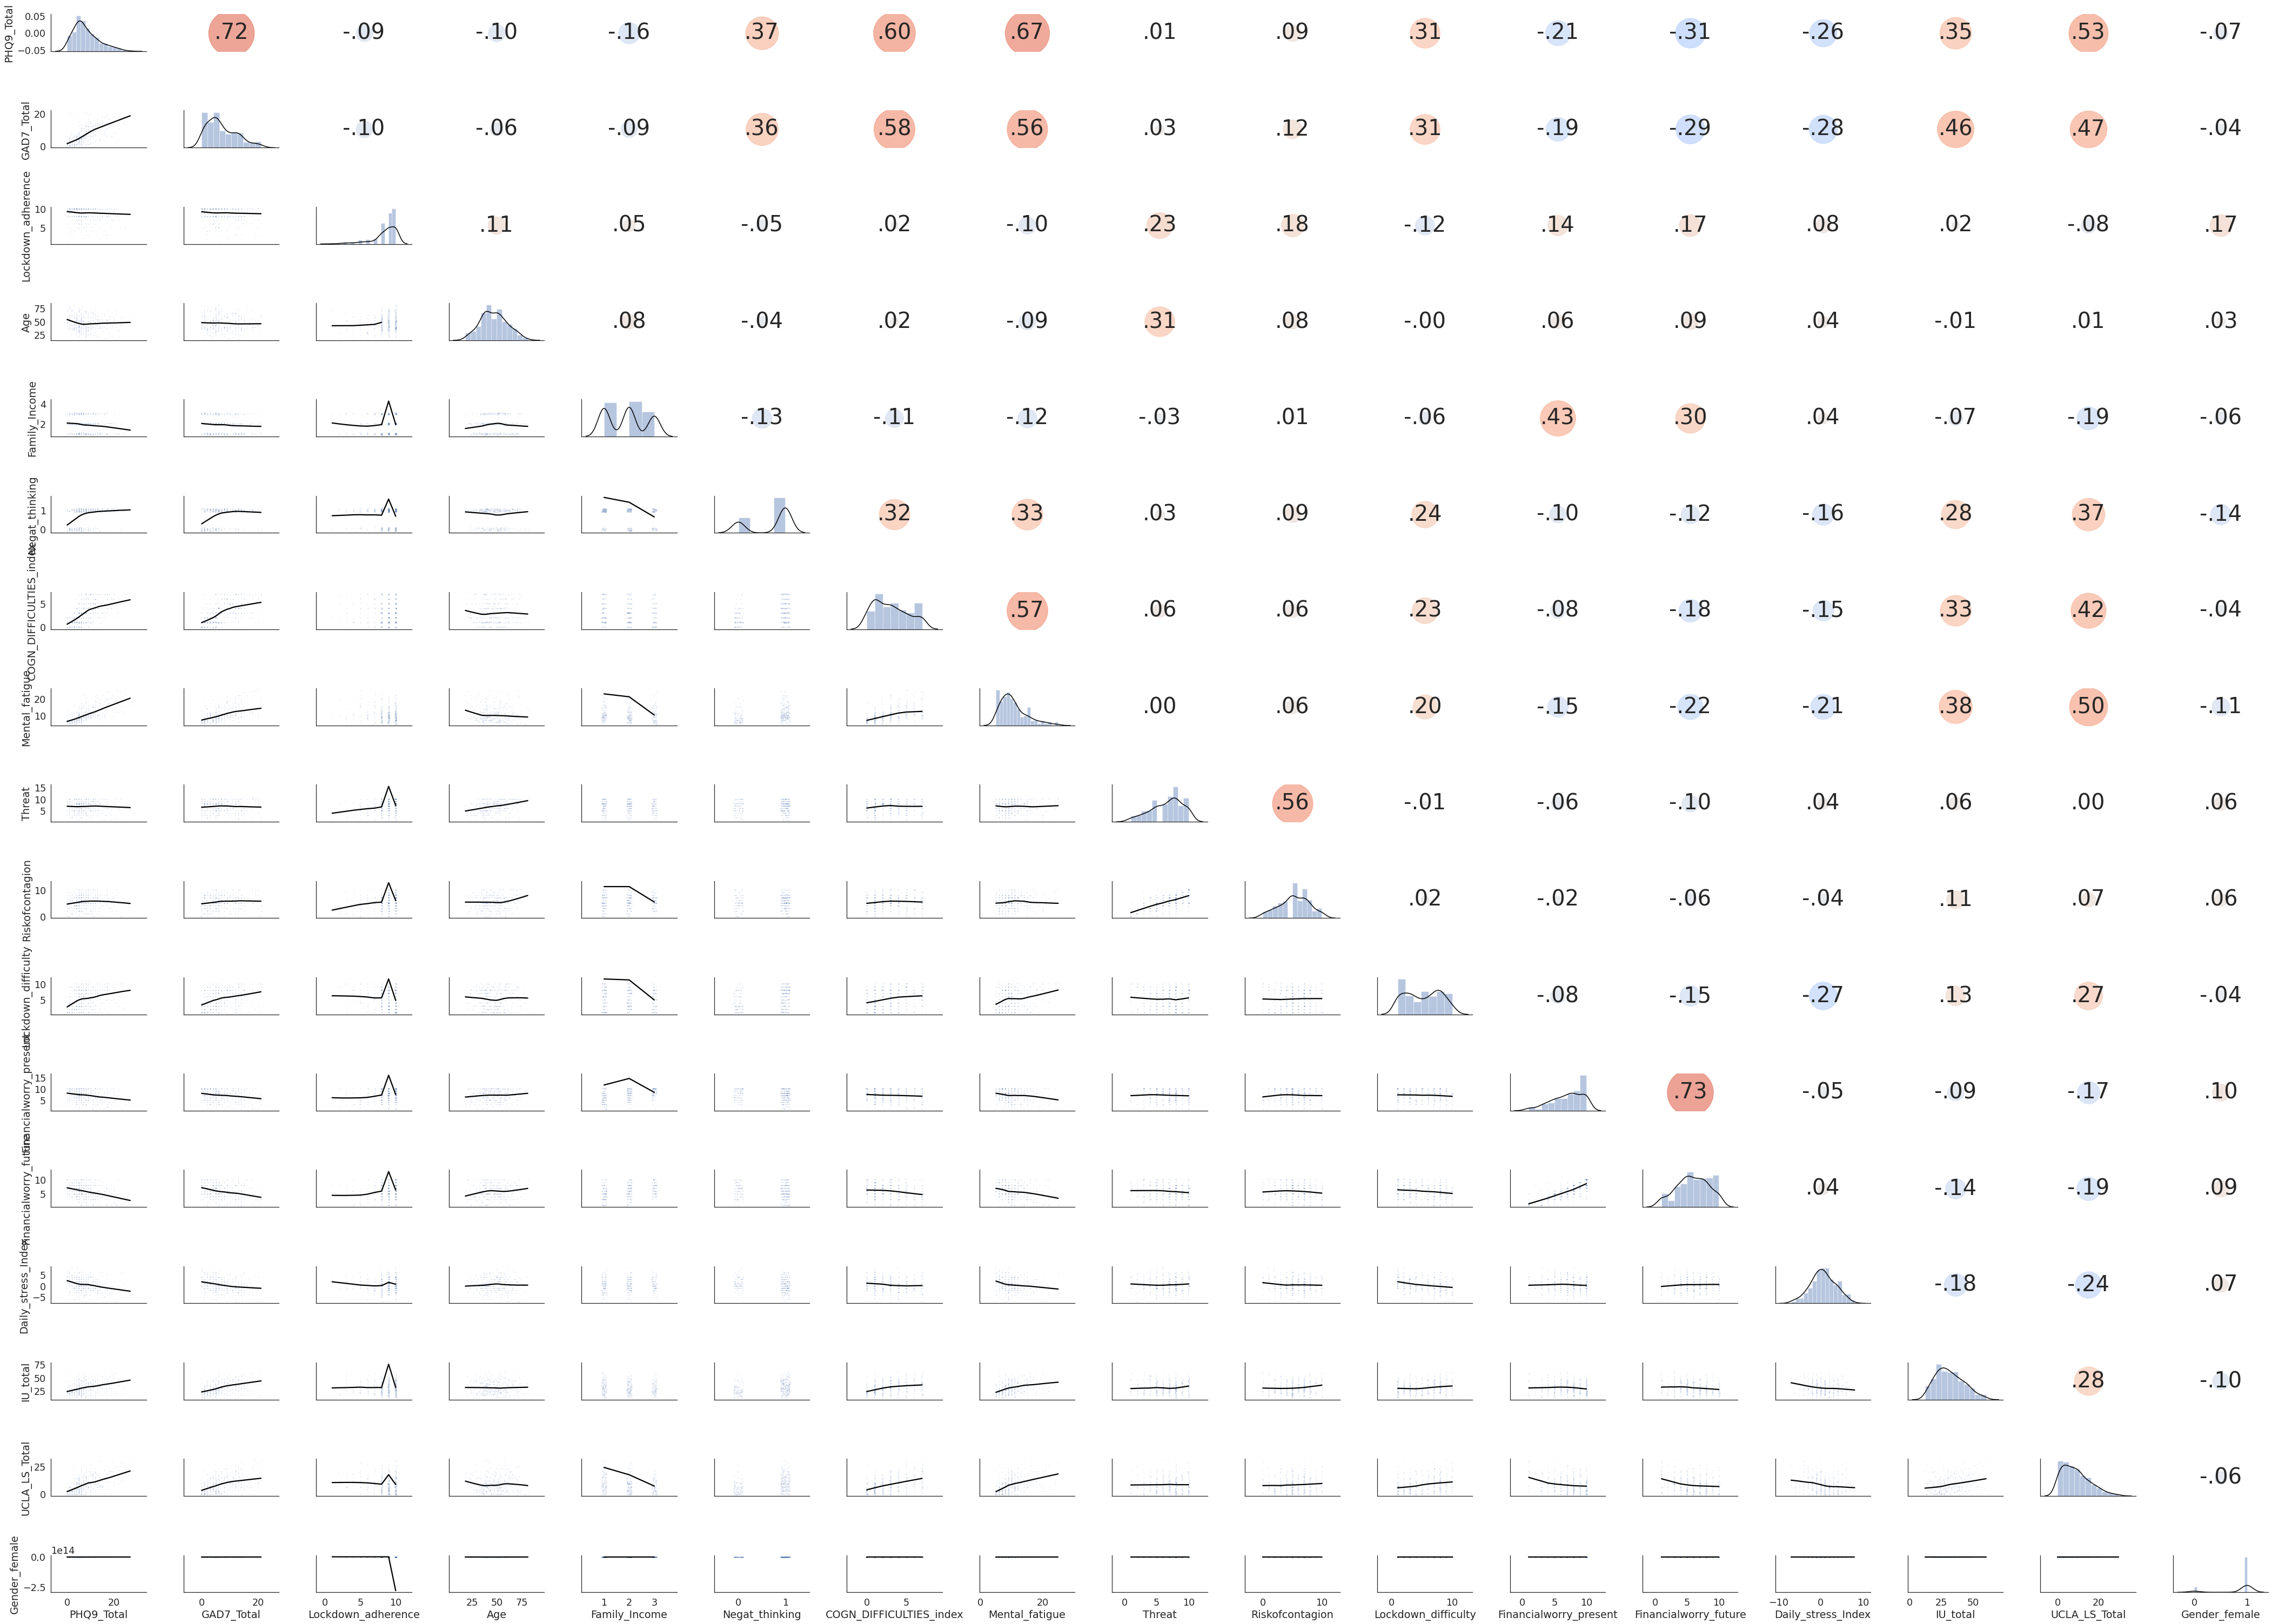

In [9]:
run_toy = True
# Pairwise correlation plot
sns.set(style='white', font_scale=1.6)
# iris = sns.load_dataset('iris')
if run_toy:
  g = sns.PairGrid(df.sample(frac=0.1), aspect=1.4, diag_sharey=False)
else:
  g = sns.PairGrid(df, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=True, line_kws={'color': 'black'}, fit_reg=True,
          x_jitter=.1, y_jitter=.1, 
            scatter_kws={"s": 1, "alpha":0.1}
            )
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)
plt.show()

In [10]:
def add_top_column(df, top_col, inplace=True):
    if not inplace:
        df = df.copy()
    
    df.columns = pd.MultiIndex.from_product([[top_col], df.columns])
    return df

In [12]:
# Create DFs for each independent variable

# Depression

variables_depression = df.drop('PHQ9_Total',axis=1).columns.values
X_depression = df.drop('PHQ9_Total',axis=1).values
y_depression = df['PHQ9_Total'].values
print('depression covariates', variables_depression)
print(X_depression.shape, y_depression.shape)
print('\n\n')

# Anxiety

variables_anxiety = df.drop('GAD7_Total',axis=1).columns.values
X_anxiety = df.drop('GAD7_Total',axis=1).values
y_anxiety = df['GAD7_Total'].values
print('Anxiety covariates', variables_anxiety)
print(X_anxiety.shape, y_anxiety.shape)
print('\n\n')


# Lockdown Adherence

variables_lockdown = df.drop('Lockdown_adherence',axis=1).columns.values
X_lockdown = df.drop('Lockdown_adherence',axis=1).values
y_lockdown = df['Lockdown_adherence'].values
print('Lockdown Adherence covariates', variables_lockdown)
print(X_lockdown.shape, y_lockdown.shape)
print('\n\n')



depression covariates ['GAD7_Total' 'Lockdown_adherence' 'Age' 'Family_Income' 'Negat_thinking'
 'COGN_DIFFICULTIES_index' 'Mental_fatigue' 'Threat' 'Riskofcontagion'
 'Lockdown_difficulty' 'Financialworry_present' 'Financialworry_future'
 'Daily_stress_Index' 'IU_total' 'UCLA_LS_Total' 'Gender_female']
(3617, 16) (3617,)



Anxiety covariates ['PHQ9_Total' 'Lockdown_adherence' 'Age' 'Family_Income' 'Negat_thinking'
 'COGN_DIFFICULTIES_index' 'Mental_fatigue' 'Threat' 'Riskofcontagion'
 'Lockdown_difficulty' 'Financialworry_present' 'Financialworry_future'
 'Daily_stress_Index' 'IU_total' 'UCLA_LS_Total' 'Gender_female']
(3617, 16) (3617,)



Lockdown Adherence covariates ['PHQ9_Total' 'GAD7_Total' 'Age' 'Family_Income' 'Negat_thinking'
 'COGN_DIFFICULTIES_index' 'Mental_fatigue' 'Threat' 'Riskofcontagion'
 'Lockdown_difficulty' 'Financialworry_present' 'Financialworry_future'
 'Daily_stress_Index' 'IU_total' 'UCLA_LS_Total' 'Gender_female']
(3617, 16) (3617,)





In [13]:
# Observe the range of the covariates
df.drop('PHQ9_Total',axis=1).describe()

,GAD7_Total,Lockdown_adherence,Age,Family_Income,Negat_thinking,COGN_DIFFICULTIES_index,Mental_fatigue,Threat,Riskofcontagion,Lockdown_difficulty,Financialworry_present,Financialworry_future,Daily_stress_Index,IU_total,UCLA_LS_Total,Gender_female
count,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,7.033177,8.441803,47.310755,1.840752,0.735693,2.969035,10.442908,6.617639,5.447885,5.279513,6.909594,5.864805,0.425491,31.962123,8.664086,0.852364
std,5.171025,1.831086,12.765485,0.775430,0.441025,2.189863,4.095191,2.417796,2.502014,2.908373,2.455660,2.402000,2.930999,10.754010,6.675201,0.354788
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-8.000000,12.000000,0.000000,0.000000
25%,3.000000,8.000000,38.000000,1.000000,0.000000,1.000000,8.000000,5.000000,4.000000,3.000000,5.000000,4.000000,-2.000000,24.000000,3.000000,1.000000
50%,6.000000,9.000000,46.000000,2.000000,1.000000,3.000000,10.000000,7.000000,5.000000,5.000000,7.000000,6.000000,0.000000,31.000000,8.000000,1.000000
75%,10.000000,10.000000,56.000000,2.000000,1.000000,5.000000,12.000000,8.000000,7.000000,8.000000,9.000000,8.000000,2.000000,39.000000,13.000000,1.000000
max,21.000000,10.000000,95.000000,3.000000,1.000000,7.000000,25.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,60.000000,30.000000,1.000000


In [11]:
# Hyperparameter tuning

# Parameters of pipelines can be set using ‘__’ separated parameter names:

def lasso_standardscaler_alpha(X,y,cv=10):
    alphas= np.logspace(-4, 0, 30) #equally spaced on log scale from 10**-4 (0.0004) to 10**0 (1)
    
    # Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
    pipe = Pipeline(steps=[
        ('scaler', StandardScaler()), 
        ('model', Lasso())
    ])
    
    # hyperparameters and their values we're testing through gridsearch
    param_grid = {
        'model__alpha': alphas,
    }
    search = GridSearchCV(pipe,param_grid, cv=cv,n_jobs=-1)

    search.fit(X,y) # Train model
    results = pd.DataFrame(search.cv_results_)
    best = results[results['rank_test_score']==1] #best hyperparameters
    mean_score = best.mean_test_score.values
    std_score = best.std_test_score.values
    alpha = float(best.param_model__alpha.values)
    return alpha

In [34]:
# Provide clean names for manuscript table
variables

array(['PHQ9_Total', 'GAD7_Total', 'Lockdown_adherence', 'Age',
       'Family_Income', 'Negat_thinking', 'COGN_DIFFICULTIES_index',
       'Mental_fatigue', 'Threat', 'Riskofcontagion',
       'Lockdown_difficulty', 'Financialworry_present',
       'Financialworry_future', 'Daily_stress_Index', 'IU_total',
       'UCLA_LS_Total', 'Gender_female'], dtype=object)

In [35]:
# Use cleaner names in the final table

clean_names= dict(zip(
    variables,
    ['PHQ9', 'GAD7','Lockdown adherence','Age','Family income', 'Negative thinking','Cognitive troubles', 'Mental fatigue', 'Perceived threat', 'Perceived risk','Lockdown difficulty','Financial worries (present)','Financial worries (future)','Daily stress', 'Intolerance of uncertainty', 'Loneliness scale', 'Female', 'Male']
    
    ))

clean_names

{'PHQ9_Total': 'PHQ9',
 'GAD7_Total': 'GAD7',
 'Lockdown_adherence': 'Lockdown adherence',
 'Age': 'Age',
 'Family_Income': 'Family income',
 'Negat_thinking': 'Negative thinking',
 'COGN_DIFFICULTIES_index': 'Cognitive troubles',
 'Mental_fatigue': 'Mental fatigue',
 'Threat': 'Perceived threat',
 'Riskofcontagion': 'Perceived risk',
 'Lockdown_difficulty': 'Lockdown difficulty',
 'Financialworry_present': 'Financial worries (present)',
 'Financialworry_future': 'Financial worries (future)',
 'Daily_stress_Index': 'Daily stress',
 'IU_total': 'Intolerance of uncertainty',
 'UCLA_LS_Total': 'Loneliness scale',
 'Gender_female': 'Female'}

In [36]:
# Train and test

coefs_all= []
r2_all=[]


for X_i,y_i,variables,name in [
    [X_depression, y_depression, variables_depression,'depression'],
    [X_anxiety, y_anxiety, variables_anxiety,'anxiety'],
    [X_lockdown, y_lockdown,  variables_lockdown,'lockdown'],
                            ]:
    #80-20 Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size=0.2, random_state=42)

    # Hyperparameter tuning     
    best_alpha = lasso_standardscaler_alpha(X_train,y_train,cv=10) # Find best alpha through CV
    
    # Train final model      
    pipe = Pipeline(steps=[
        ('scaler', StandardScaler()), 
        ('model', Lasso(alpha = best_alpha))
    ])
    pipe.fit(X_train,y_train)
    
    # Test     
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    
    # Obtain standardized beta coefficients     
    coefs= pd.DataFrame(pipe['model'].coef_,index=variables, columns= ['Coef.'])
    
    # Clean dataframe     
    coefs.index = [clean_names.get(n) for n in coefs.index.values]
    coefs['Abs. Coef.'] = coefs['Coef.'].abs()
    coefs= coefs.sort_values('Abs. Coef.')[::-1].reset_index()
    coefs.index +=1
    coefs= coefs.reset_index().round(2)
    coefs.columns= ['Importance', 'Covariate', 'Coef.','Abs. Coef.']
    coefs['Coef.'] =     coefs['Coef.'].astype(str).replace('^(-)0.|^0.',r'\1.',regex=True)
    if name == 'depression':
        coefs= coefs.drop(['Abs. Coef.'], axis=1)#drop abs value
    else:
        coefs= coefs.drop(['Abs. Coef.','Importance'], axis=1)#drop abs value
    
    coefs = add_top_column(coefs,f'{name.capitalize()} R^2 = {np.round(r2,2)}' )
    coefs.to_csv(output_dir+f'coefs_{name}.csv',index=False)
    coefs_all.append(coefs)
    r2_all.append([name,np.round(r2,2)])



In [38]:
# Concatenate 3 dataframes
coefs_all_clean = pd.concat(coefs_all,axis=1)
coefs_all_clean.to_csv(output_dir+'coefs_all.csv', index=False)
coefs_all_clean

Depression R^2 = 0.69                                     \
              Importance                    Covariate Coef.   
0                      1                         GAD7  2.57   
1                      2               Mental fatigue  1.53   
2                      3           Cognitive troubles   .68   
3                      4             Loneliness scale   .49   
4                      5                 Daily stress  -.29   
5                      6          Lockdown difficulty   .22   
6                      7  Financial worries (present)  -.17   
7                      8                Family income  -.15   
8                      9   Intolerance of uncertainty   .14   
9                     10                          Age  -.12   
10                    11                       Female    .1   
11                    12            Negative thinking   .08   
12                    13   Financial worries (future)  -.02   
13                    14               Perceived risk    .0   
14                    15             Perceived threat   -.0   
15                    16           Lockdown adherence   -.0   

             Anxiety R^2 = 0.63                 Lockdown R^2 = 0.1        
                      Covariate Coef.                    Covariate Coef.  
0                          PHQ9  2.62             Perceived threat   .39  
1    Intolerance of uncertainty   .83                       Female   .12  
2           Lockdown difficulty   .48  Financial worries (present)    .1  
3            Cognitive troubles   .32               Perceived risk   .09  
4              Loneliness scale   .31            Negative thinking  -.08  
5                 Family income   .29   Intolerance of uncertainty   .08  
6             Negative thinking   .29           Cognitive troubles  -.07  
7                  Daily stress  -.21                 Daily stress   .05  
8   Financial worries (present)  -.19                Family income   .05  
9    Financial worries (future)  -.19                         GAD7  -.05  
10               Perceived risk   .13                          Age  -.02  
11                       Female   .12                         PHQ9  -.02  
12               Mental fatigue    .1             Loneliness scale   -.0  
13                          Age  -.07   Financial worries (future)    .0  
14           Lockdown adherence  -.06          Lockdown difficulty   -.0  
15             Perceived threat   .01               Mental fatigue   -.0